In [3]:
#task 0
import nltk
from nltk.book import text3
from nltk.tokenize import word_tokenize
from collections import Counter

# необхідні дані NLTK доступні
nltk.download('punkt', quiet=True) # quiet=True, щоб не виводити повідомлення про завантаження
nltk.download('book', quiet=True)

# Перетворюємо об'єкт NLTK Text на необроблений рядок 
raw_text = ' '.join(text3)

# Токенізуємо весь документ на слова (у нижньому регістрі)
tokens = word_tokenize(raw_text.lower())

# Будуємо словник: унікальні слова в документі
vocab = sorted(set(tokens))
vocab_size = len(vocab)
word2index = {word: idx for idx, word in enumerate(vocab)}

# Обчислюємо вектор "Мішок слів" (Bag-of-Words) для одного документа
def bow_vector(doc_tokens, word2index_map):
    counts = Counter(doc_tokens)
    vector = [0] * len(word2index_map)
    for word, count in counts.items():
        if word in word2index_map: # перевіряємо, чи слово є у нашому словнику
            vector[word2index_map[word]] = count
    return vector
# вектор BoW
bow_vec = bow_vector(tokens, word2index)

# Друкуємо ненульові елементи вектора BoW
non_zero = {vocab[idx]: count for idx, count in enumerate(bow_vec) if count > 0}
print("Вектор 'Мішок слів' для text3 (ненульові елементи):")
print(non_zero)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
Вектор 'Мішок слів' для text3 (ненульові елементи):
{'!': 2, "'": 268, '(': 6, ')': 6, ',': 3682, '.': 1316, ':': 238, ';': 606, '?': 149, 'a': 344, 'abated': 3, 'abel': 8, 'abelmizraim': 1, 'abidah': 1, 'abide': 5, 'abimael': 1, 'abimelech': 24, 'able': 3, 'abode': 2, 'abomination': 2, 'about': 11, 'above': 11, 'abr': 1, 'abrah': 5, 'abraham': 129, 'abram': 58, 'abroad': 7, 'absent': 1, 'abundantly': 4, 'accad': 1, 'accept': 1, 'accepted': 2, 'according': 32, 'achbor': 2, 'acknow

Завдання 0 для випадково згенерованого корпусу

In [4]:
import random
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=True) # quiet=True, щоб не виводити повідомлення про завантаження

# Згенерувати випадкові речення та реалізувати теггер "Мішок слів"

#генеруємо невеликий випадковий "корпус" речень
subjects = ["The cat", "A scientist", "My friend", "An artist", "The teacher"] # Підмети
verbs = ["writes", "eats", "discovers", "paints", "studies"] # Дієслова
objects = ["a book", "delicious food", "new elements", "beautiful landscapes", "ancient history"] # Додатки
adverbs = ["quickly", "eagerly", "carefully", "boldly", "happily"] # Прислівники

# створюємо  10 випадкових речень
documents = [] # Список для зберігання наших речень
for _ in range(10): 
    subj = random.choice(subjects) # Випадково обираємо підмет
    verb = random.choice(verbs)    # Випадково обираємо дієслово
    obj = random.choice(objects)   # Випадково обираємо додаток
    adv = random.choice(adverbs)   # Випадково обираємо прислівник
    sentence = f"{subj} {verb} {obj} {adv}." # Формуємо речення
    documents.append(sentence) # Додаємо речення до списку документів


print("Згенеровані випадкові речення (документи):")
for i, sent in enumerate(documents, start=1): # Нумеруємо речення з 1
    print(f"Документ {i}: {sent}")

#токенізуємо кожен документ (речення), переводячи його в нижній регістр
tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]

# множина всіх унікальних токенів з усіх документів, відсортована
vocab = sorted({token for doc in tokenized_docs for token in doc})

# відображення "слово -> індекс" для слів зі словника
word2index = {word: idx for idx, word in enumerate(vocab)}

def bow_vector(doc_tokens, current_word2index):
    counts = Counter(doc_tokens) #  кількість кожного токена в документі
    vector = [0] * len(current_word2index) # Ініціалізуємо вектор нулями, довжина = розмір словника
    for word, count in counts.items(): # Ітеруємо по словах та їх частотах у документі
        if word in current_word2index: # Якщо слово є в нашому загальному словнику
            vector[current_word2index[word]] = count # Записуємо його частоту у відповідну позицію вектора
    return vector

print("\nВектори 'Мішок слів' (ненульові елементи):")
for i, tokens_for_doc in enumerate(tokenized_docs, start=1): # Ітеруємо по токенізованих документах
    vec = bow_vector(tokens_for_doc, word2index) # Обчислюємо BoW-вектор для поточного документа
    non_zero = {vocab[idx]: count for idx, count in enumerate(vec) if count > 0}
    print(f"Документ {i}: {non_zero}")

Згенеровані випадкові речення (документи):
Документ 1: An artist studies delicious food boldly.
Документ 2: The cat paints delicious food eagerly.
Документ 3: The teacher paints new elements boldly.
Документ 4: The teacher discovers delicious food happily.
Документ 5: The teacher eats ancient history quickly.
Документ 6: My friend eats a book boldly.
Документ 7: The teacher writes a book carefully.
Документ 8: A scientist studies new elements eagerly.
Документ 9: An artist discovers beautiful landscapes carefully.
Документ 10: An artist eats beautiful landscapes quickly.

Вектори 'Мішок слів' (ненульові елементи):
Документ 1: {'.': 1, 'an': 1, 'artist': 1, 'boldly': 1, 'delicious': 1, 'food': 1, 'studies': 1}
Документ 2: {'.': 1, 'cat': 1, 'delicious': 1, 'eagerly': 1, 'food': 1, 'paints': 1, 'the': 1}
Документ 3: {'.': 1, 'boldly': 1, 'elements': 1, 'new': 1, 'paints': 1, 'teacher': 1, 'the': 1}
Документ 4: {'.': 1, 'delicious': 1, 'discovers': 1, 'food': 1, 'happily': 1, 'teacher': 1

In [5]:
#task1
import nltk
from nltk.book import text3 
from nltk.tokenize import word_tokenize # для розбиття тексту на слова (токени)
from nltk.util import ngrams 
from collections import Counter # для підрахунку частот елементів


N = 2  # 2 для біграм, 3 для триграм

nltk.download('punkt', quiet=True) 
nltk.download('book', quiet=True)  

#перетворюємо об'єкт NLTK Text на необроблений рядок 
raw_text = ' '.join(text3)

# токенізуємо весь документ на слова (переводимо в нижній регістр)
tokens = word_tokenize(raw_text.lower())


ngram_list = list(ngrams(tokens, N)) # ngrams повертає генератор, тому перетворюємо на список
# об'єднуємо кожен кортеж N-грами в один рядок
ngram_tokens = [' '.join(gram) for gram in ngram_list] # ('in', 'the') -> 'in the'


vocab = sorted(set(ngram_tokens))
vocab_size = len(vocab) 
word2index = {ng: idx for idx, ng in enumerate(vocab)} # Створюємо відображення N-грами на її індекс
                                                      # 'ng' - N-граму

# для одного документа
def bow_ngram_vector(current_ngram_tokens, current_word2index):
    counts = Counter(current_ngram_tokens) # частота кожної N-грами в документі
    vector = [0] * len(current_word2index) # Ініціалізуємо вектор нулями
    for ng, count in counts.items():
        if ng in current_word2index: # Якщо N-грама є в нашому словнику
            vector[current_word2index[ng]] = count # Записуємо її частоту у вектор
    return vector

bow_vec = bow_ngram_vector(ngram_tokens, word2index)

# виводимо тільки ті N-грами, які реально зустрілися (ненульові значення вектора)
non_zero = {vocab[idx]: count for idx, count in enumerate(bow_vec) if count > 0}

print(f"Вектор 'Мішок {N}-грам' для text3 (ненульові елементи):")
print(non_zero)

Вектор 'Мішок 2-грам' для text3 (ненульові елементи):
{'! and': 1, '! this': 1, "' daughters": 1, "' journey": 2, "' land": 1, "' mouths": 1, "' s": 255, "' sons": 1, "' tents": 1, "' trade": 1, "' wives": 5, '( for': 2, '( from': 1, '( is': 1, '( out': 1, '( the': 1, ') and': 4, ') even': 1, ') that': 1, ', (': 3, ', )': 1, ', a': 13, ', abide': 1, ', abr': 1, ', abrah': 2, ', abraham': 7, ', abram': 2, ', according': 9, ', adah': 1, ', after': 19, ', against': 1, ', all': 8, ', also': 2, ', am': 2, ', among': 3, ', an': 12, ', and': 1517, ', aner': 1, ', appoint': 1, ', are': 3, ', arioch': 1, ', arise': 2, ', art': 1, ', as': 39, ', at': 4, ', bare': 1, ', be': 7, ', bear': 1, ', because': 34, ', before': 7, ', behold': 98, ', being': 3, ', beside': 1, ', besides': 1, ', bethel': 2, ', between': 3, ', beware': 1, ', bless': 2, ', blessed': 3, ', blessings': 2, ', born': 2, ', both': 13, ', bought': 1, ', bow': 1, ', bowing': 1, ', brethren': 1, ', bring': 9, ', brother': 1, ', but':

In [7]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize 
from collections import Counter, defaultdict 
import math

nltk.download('punkt', quiet=True)
nltk.download('gutenberg', quiet=True)  


from nltk.corpus import gutenberg
raw_text = gutenberg.raw('austen-emma.txt') 

# Розділяємо на абзаци (розділені порожнім рядком)
paragraphs = [p for p in raw_text.split('\n\n') if p.strip()] # Видаляємо порожні абзаци

def build_vocabulary(paragraphs_tokens_list):
    # Створюємо словник з усіх унікальних токенів у всіх абзацах та реченнях
    vocab_set = sorted({token for para_tokens in paragraphs_tokens_list
                        for sent_tokens in para_tokens
                        for token in sent_tokens})
    return {word: i for i, word in enumerate(vocab_set)}, vocab_set # Повертаємо мапу слово->індекс та список слів

# обчислення PPMI з підрахунків співзустрічальностей
def compute_ppmi(current_co_counts, current_w_counts, current_c_counts, current_total_co):
    ppmi_matrix = defaultdict(dict) # Словник для зберігання значень PPMI
    for w, contexts in current_co_counts.items(): # Ітеруємо по цільових словах та їх контекстах
        for c, wc_count in contexts.items(): # Ітеруємо по контекстних словах та їх кількості співзустрічальностей з w
            p_wc = wc_count / current_total_co #  ймовірність спільної появи w та c
            # Ймовірність P(w) - як часто w є цільовим словом
            p_w = current_w_counts[w] / current_total_co
            # Ймовірність P(c) - як часто c є контекстним словом
            p_c = current_c_counts[c] / current_total_co

            if p_wc > 0 and p_w > 0 and p_c > 0: # Уникаємо ділення на нуль та логарифму від нуля
                pmi_val = math.log2(p_wc / (p_w * p_c))
            else:
                pmi_val = 0 # Або дуже мале негативне число, але для PPMI це не важливо
            ppmi_matrix[w][c] = max(pmi_val, 0) # PPMI - це позитивна PMI
    return ppmi_matrix

# Завдання 2: PPMI зі співзустрічальністю на рівні абзаців
# Токенізуємо абзаци на речення, а потім на слова
paragraphs_tokens = []
for para_text in paragraphs:
    sents = sent_tokenize(para_text) # Розбиваємо абзац на речення
    paragraphs_tokens.append([word_tokenize(s.lower()) for s in sents])

# Рахуємо співзустрічальності, якщо два слова з'являються в одному абзаці
co_counts_para = defaultdict(lambda: Counter()) # Співзустрічальності (слово, контекст) -> кількість
word_counts_para = Counter() # Як часто слово було цільовим (кількість абзаців, де воно є)
context_counts_para = Counter() # Як часто слово було контекстним
total_co_occurrences_para = 0 # Загальна кількість пар співзустрічальностей

for para_token_list in paragraphs_tokens:
    # Зводимо токени абзацу до множини унікальних слів у цьому абзаці
    unique_words_in_para = set([word for sent_tokens in para_token_list for word in sent_tokens if word.isalpha()]) # Враховуємо тільки слова
    for w_target in unique_words_in_para:
        word_counts_para[w_target] += 1 # w_target було цільовим у цьому абзаці
        for c_context in unique_words_in_para:
            if w_target != c_context: # Слово не може бути контекстом для самого себе
                co_counts_para[w_target][c_context] += 1
                total_co_occurrences_para += 1
                context_counts_para[c_context] += 1 # c_context було контекстним

ppmi_para = compute_ppmi(co_counts_para, word_counts_para, context_counts_para, total_co_occurrences_para)
print("PPMI на основі співзустрічальності в абзацах :")
# Виводимо PPMI для перших 5 слів та їх перших 5 контекстів
for w_key in list(ppmi_para)[:5]:
    print(w_key, {c_key: round(ppmi_para[w_key][c_key], 2) for c_key in list(ppmi_para[w_key])[:5]})


# Завдання 3: PPMI зі співзустрічальністю у ковзному вікні (розмір вікна k)
k_window_size = 5  # розмір вікна (кількість слів зліва та справа)
all_tokens = [token.lower() for token in word_tokenize(raw_text) if token.isalpha()] # Всі токени з тексту, очищені

co_counts_win = defaultdict(lambda: Counter()) # Співзустрічальності у вікні
word_counts_win = Counter() # Як часто слово було цільовим у вікні
context_counts_win = Counter() # Як часто слово було контекстним у вікні
total_co_occurrences_win = 0 # Загальна кількість пар співзустрічальностей у вікнах

# ковзне вікно
for i, w_target in enumerate(all_tokens):
    word_counts_win[w_target] += 1 # w_target є цільовим словом
    # Визначаємо ліву та праву межі вікна
    start_index = max(0, i - k_window_size)
    end_index = min(len(all_tokens), i + 1 + k_window_size)
    # Формуємо контекстне вікно (слова зліва та справа від цільового)
    window_tokens = all_tokens[start_index:i] + all_tokens[i+1:end_index]
    for c_context in window_tokens:
        co_counts_win[w_target][c_context] += 1
        total_co_occurrences_win += 1
        context_counts_win[c_context] += 1 # c_context було контекстним

ppmi_win = compute_ppmi(co_counts_win, word_counts_win, context_counts_win, total_co_occurrences_win)
print("\nPPMI на основі співзустрічальності у ковзному вікні :")
# Виводимо PPMI для перших 5 слів та їх перших 5 контекстів
for w_key in list(ppmi_win)[:5]:
    print(w_key, {c_key: round(ppmi_win[w_key][c_key], 2) for c_key in list(ppmi_win[w_key])[:5]})

PPMI на основі співзустрічальності в абзацах :
jane {'emma': 6.28, 'by': 6.19, 'austen': 13.89, 'every': 6.27, 'about': 6.76}
emma {'jane': 5.91, 'by': 6.12, 'austen': 11.98, 'existence': 6.0, 'nearly': 5.49}
by {'jane': 6.23, 'emma': 6.54, 'austen': 12.77, 'most': 6.53, 'period': 6.38}
austen {'jane': 9.18, 'emma': 7.65, 'by': 8.03}
volume {'i': 5.9, 'ii': 19.48, 'iii': 19.48}

PPMI на основі співзустрічальності у ковзному вікні :
emma {'by': 3.22, 'jane': 3.09, 'austen': 8.84, 'volume': 7.56, 'i': 2.77}
by {'emma': 3.22, 'jane': 2.88, 'austen': 8.43, 'volume': 6.57, 'i': 2.56}
jane {'emma': 3.09, 'by': 2.88, 'austen': 9.35, 'volume': 7.49, 'i': 3.25}
austen {'emma': 8.51, 'by': 8.11, 'jane': 9.03, 'volume': 15.73, 'i': 6.63}
volume {'emma': 7.51, 'by': 6.53, 'jane': 7.44, 'austen': 16.0, 'i': 6.04}


завдання 4

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter, defaultdict
import math

nltk.download('punkt', quiet=True)
nltk.download('gutenberg', quiet=True)

from nltk.corpus import gutenberg
raw_text = gutenberg.raw('austen-emma.txt')

tokens = [t.lower() for t in word_tokenize(raw_text) if t.isalpha()]
word_freq = Counter(tokens)

# Фільтруємо рідкісні слова за порогом
min_freq = 5  # слова, що зустрічаються рідше, видаляються
vocab = {w for w, cnt in word_freq.items() if cnt >= min_freq}
filtered_tokens = [w for w in tokens if w in vocab]

# Співзустрічальність у ковзному вікні
window_size = 5
co_counts = defaultdict(lambda: Counter())
context_counts = Counter()
total_pairs = 0
for i, w in enumerate(filtered_tokens):
    if w not in vocab: continue
    window = filtered_tokens[max(0, i-window_size): i] + filtered_tokens[i+1: i+1+window_size]
    for c in window:
        if c not in vocab or c == w: continue
        co_counts[w][c] += 1
        context_counts[c] += 1
        total_pairs += 1

# Параметр адитивного згладжування
add_k = 1

# Експонента згладжування розподілу контексту
alpha = 0.75

# Обчислюємо згладжену граничну частоту контексту
smoothed_context = {c: cnt**alpha for c, cnt in context_counts.items()}
sum_smoothed_context = sum(smoothed_context.values())

# Функція для обчислення PPMI, SPPMI зі згладжуванням
def compute_ppmi_sppmi(co_counts_param, word_freq_param, context_counts_param, total_pairs_param,
                       add_k_param=1, smoothed_context_param=None, sum_smoothed_context_param=None, shift_k_param=1):
    ppmi = defaultdict(dict)
    sppmi = defaultdict(dict)
    # Попередньо обчислюємо загальну кількість слів (токенів) зі словника
    total_words = sum(word_freq_param[w_v] for w_v in vocab)
    for w_target, contexts in co_counts_param.items():
        for c_context, count_wc in contexts.items():
            # "Сирі" частоти з адитивним згладжуванням
            co_sc = count_wc + add_k_param
            p_wc = co_sc / (total_pairs_param + add_k_param * len(vocab)**2)
            p_w = (word_freq_param[w_target] + add_k_param * len(vocab)) / (total_words + add_k_param * len(vocab)**2)
            # Використовуємо згладжений або "сирий" контекст
            if smoothed_context_param:
                p_c = smoothed_context_param[c_context] / sum_smoothed_context_param
            else:
                p_c = (context_counts_param[c_context] + add_k_param * len(vocab)) / (total_pairs_param + add_k_param * len(vocab)**2)
            # PMI та PPMI
            # + перевірки, щоб уникнути ділення на нуль або логарифму від недодатного числа
            if p_wc > 0 and p_w > 0 and p_c > 0:
                denominator_pmi = p_w * p_c
                if denominator_pmi > 0:
                    pmi = math.log2(p_wc / denominator_pmi)
                else:
                    pmi = 0 # Або інше значення за замовчуванням, якщо знаменник нульовий
            else:
                pmi = 0
            ppmi_val = max(pmi, 0)
            # Зсунута PPMI
            # Перевіряємо, що shift_k_param > 0 перед взяттям логарифму
            log_shift_k = math.log2(shift_k_param) if shift_k_param > 0 else -float('inf')
            sppmi_val = max(pmi - log_shift_k, 0)

            ppmi[w_target][c_context] = ppmi_val
            sppmi[w_target][c_context] = sppmi_val
    return ppmi, sppmi

# Обчислюємо PPMI та SPPMI
ppmi_matrix, sppmi_matrix = compute_ppmi_sppmi(
    co_counts, word_freq, context_counts, total_pairs,
    add_k_param=add_k, smoothed_context_param=smoothed_context,
    sum_smoothed_context_param=sum_smoothed_context, shift_k_param=5
)

print("Зразки значень PPMI:")
for w_print in list(ppmi_matrix)[:5]:
    print(w_print, {c_print: round(ppmi_matrix[w_print][c_print], 2) for c_print in list(ppmi_matrix[w_print])[:5]})

print("\nЗразки значень SPPMI (зсув=5):")
for w_print in list(sppmi_matrix)[:5]:
    print(w_print, {c_print: round(sppmi_matrix[w_print][c_print], 2) for c_print in list(sppmi_matrix[w_print])[:5]})

Зразки значень PPMI:
emma {'by': 1.44, 'jane': 1.09, 'i': 1.54, 'chapter': 2.81, 'woodhouse': 0.96}
by {'emma': 1.13, 'jane': 0.4, 'i': 0.89, 'chapter': 1.04, 'her': 2.12}
jane {'emma': 0.23, 'by': 0, 'i': 0.75, 'chapter': 0.77, 'woodhouse': 0}
i {'emma': 2.13, 'by': 1.79, 'jane': 2.2, 'chapter': 1.27, 'woodhouse': 2.48}
chapter {'emma': 0.28, 'by': 0, 'jane': 0, 'i': 0, 'woodhouse': 0}

Зразки значень SPPMI (зсув=5):
emma {'by': 0, 'jane': 0, 'i': 0, 'chapter': 0.49, 'woodhouse': 0}
by {'emma': 0, 'jane': 0, 'i': 0, 'chapter': 0, 'her': 0}
jane {'emma': 0, 'by': 0, 'i': 0, 'chapter': 0, 'woodhouse': 0}
i {'emma': 0, 'by': 0, 'jane': 0, 'chapter': 0, 'woodhouse': 0.16}
chapter {'emma': 0, 'by': 0, 'jane': 0, 'i': 0, 'woodhouse': 0}


завдання 5

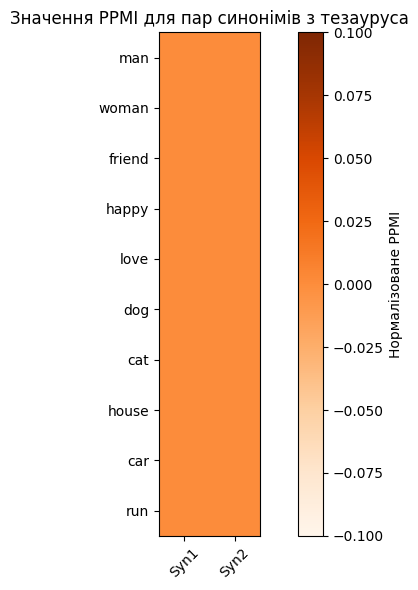

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter, defaultdict
import math
import matplotlib.pyplot as plt
import numpy as np

nltk.download('punkt', quiet=True)
nltk.download('gutenberg', quiet=True)
from nltk.corpus import gutenberg
raw = gutenberg.raw('austen-emma.txt')  
tokens = [t.lower() for t in word_tokenize(raw) if t.isalpha()]

# Співзустрічальність у ковзному вікні (k=5)
k = 5
co_counts = defaultdict(Counter)
w_counts = Counter(tokens)
c_counts = Counter()
total = 0
for i, w in enumerate(tokens):
    window = tokens[max(0,i-k):i] + tokens[i+1:i+1+k]
    for c in window:
        if c != w:
            co_counts[w][c] += 1
            c_counts[c] += 1
            total += 1

# Функція PPMI
def compute_ppmi(co, w_cnt, c_cnt, tot):
    pp = defaultdict(dict)
    for w, ctxs in co.items():
        for c, wc in ctxs.items():
            p_wc = wc/tot
            p_w = w_cnt[w]/tot
            p_c = c_cnt[c]/tot
            # Перевіряємо, чи знаменник не нуль і чи p_wc > 0
            if p_wc > 0 and p_w > 0 and p_c > 0:
                denominator = p_w * p_c
                if denominator > 0:
                    val = math.log2(p_wc / denominator)
                else:
                    val = 0 # Або інше значення, якщо знаменник нульовий
            else:
                val = 0
            pp[w][c] = max(val,0)
    return pp

ppmi = compute_ppmi(co_counts, w_counts, c_counts, total)

# Синоніми з тезауруса
synonyms = {
    'man': ['gentleman','fellow'],
    'woman': ['lady','maiden'],
    'friend': ['buddy','pal'],
    'happy': ['fortunate','lucky'],
    'love': ['cherish','admire'],
    'dog': ['canine','pooch'],
    'cat': ['feline','kitty'],
    'house': ['abode','dwelling'],
    'car': ['automobile','auto'],
    'run': ['sprint','dash']
}

# 5матриці значень PPMI
words = list(synonyms.keys())
mat = np.zeros((len(words), 2))
for i, w in enumerate(words):
    for j, s in enumerate(synonyms[w]):
        mat[i,j] = ppmi.get(w,{}).get(s,0)

# Нормалізація до [0,1]
if mat.max()>0:
    mat = mat/mat.max()

# теплокарти помаранчевим кольором
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(mat, cmap='Oranges', interpolation='nearest')
ax.set_xticks([0,1]); ax.set_xticklabels(['Syn1','Syn2'])
ax.set_yticks(range(len(words))); ax.set_yticklabels(words)
plt.xticks(rotation=45)
fig.colorbar(cax, label='Нормалізоване PPMI')
ax.set_title('Значення PPMI для пар синонімів з тезауруса')
plt.tight_layout()
plt.show()